## 黄金分割搜索

In [33]:
import numpy as np

In [34]:
def golden_section_search(f, a, b, epsilon=1e-10, num_epochs=200):
    tau = 0.5 * (np.sqrt(5) - 1) # 黄金比率
    x0 = a + (1 - tau) * (b - a)
    x1 = a + tau * (b - a)
    f0 = f(x0)
    f1 = f(x1)
    c = []
    for k in range(num_epochs):
        c.append(0.5 * (a + b))
        if abs(b - a) < epsilon:
            print("The number of iterations: {}".format(k+1))
            break
        elif f0 >= f1: # 移除左区间[a, x0]
            a = x0
            x0 = x1
            f0 = f1
            x1 = a + tau * (b - a)
            f1 = f(x1)
        else:           # 移除右区间[x1,b]
            b = x1
            x1 = x0
            f1 = f(x0)
            x0 = a + (1 - tau) * (b - a)
            f0 = f(x0)
            
    return c[-1], c

## 1. $f(x)=|x+1| + 1$,找到它的最小值

In [35]:
import matplotlib.pyplot as plt

In [36]:
f = lambda x: abs(x + 1) + 1

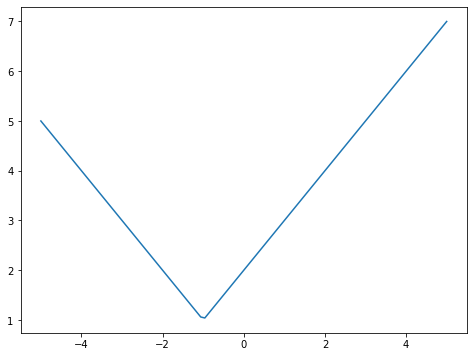

In [37]:
xn = np.linspace(-5, 5, 100)
plt.figure(figsize=(8, 6))
plt.plot(xn, f(xn))
plt.show()

In [38]:
x_min, iter_pts = golden_section_search(f, -5, 5)
x_min

The number of iterations: 54


-0.9999999999836918

### 迭代过程

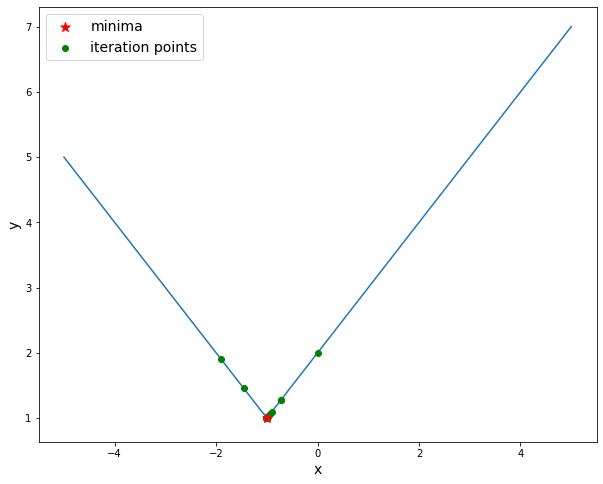

In [39]:
plt.figure(figsize=(10, 8))
plt.plot(xn, f(xn))
plt.scatter(x_min, f(x_min), c='red', marker="*", s=100, 
            zorder=10, label="minima")
f_iter = [f(p) for p in iter_pts]
plt.scatter(iter_pts, f_iter, c='g', zorder=5, label="iteration points")
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.legend(fontsize=14)
plt.show()

### 使用 `Scipy`

In [40]:
from scipy import optimize

optimize.minimize_scalar(f, bracket=(-5, 5), method='Golden')

     fun: 1.0000000025769449
    nfev: 48
     nit: 43
 success: True
       x: -0.9999999974230552

## 2. $g(x)= 2\pi x^2 + \frac 2 x$, 找到它的最小值

In [41]:
g = lambda x: 2 * np.pi * x**2 + 2 / (x + 1e-10)

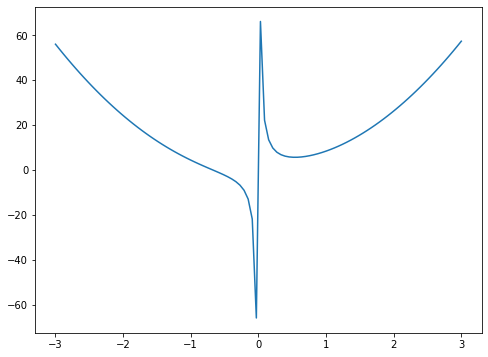

In [42]:
xn = np.linspace(-3, 3, 100)

plt.figure(figsize=(8, 6))
plt.plot(xn, g(xn))
plt.show()

In [43]:
x_min, iter_pts = golden_section_search(g, -3, 3)
x_min, g(x_min)

The number of iterations: 53


(-1.0659538290216386e-10, -303242439395.56976)

### 使用`Scipy`

In [44]:
from scipy import optimize

optimize.minimize_scalar(g, bracket=(-3, 3), method='Golden')

     fun: -8.368048939405769e+18
    nfev: 95
     nit: 90
 success: True
       x: -1.0000000023900434e-10